<h2> Característica Torque x Velocidade motor de indução trifásico

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

<h5> Definindo os parametros da máquina

In [56]:
V1 = 460/pow(3, 1/2)
freq = 60
polos = 4
hp = 25

R1 = 0.15
X1 = 0.852
Xm = 20
R2_ = 0.154
X2_ = 1.066

<h5> Calculando os parâmetros do equivalewnte de Thévenin

In [57]:
Vth = (V1*Xm*1j)/(R1+(X1+Xm)*1j)
Zth = pow(1/(Xm*1j)+1/(R1+X1*1j),-1)

Rth = Zth.real
Xth = Zth.imag

Vth_mod, Vth_ang = cmath.polar(Vth)
Vth_ang = Vth_ang*360/(2*np.pi)

print("Vth = {}|_{} V".format(Vth_mod, Vth_ang))
print("Rth = ", Rth)
print("Xth = ", Xth)

Vth = 254.72305059514355|_0.4121532076864707 V
Rth =  0.13798546610124393
Xth =  0.8181804057124107


<h5> Calculando o torque trifásico

In [58]:
# Calculando a velocidade síncrona

n_s = 120*freq/polos
omega_s = n_s*2*np.pi/60
print("Velocidade síncrona = {} rpm".format(n_s))
print("Velocidade síncrona = {} rad/s".format(omega_s))

omega = np.linspace(0, omega_s - 0.0001, 100)

# Calculando o torque

T = (3/omega_s)*(R2_/((omega_s - omega)/omega_s))*(abs(Vth)**2)/((Rth+R2_/((omega_s - omega)/omega_s))**2 + (Xth + X2_)**2)

Velocidade síncrona = 1800.0 rpm
Velocidade síncrona = 188.49555921538757 rad/s


<h5> Cirando a curva Torque x Velocidade

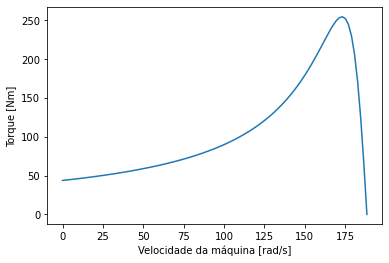

In [59]:
plt.xlabel("Velocidade da máquina [rad/s]")
plt.ylabel("Torque [Nm]")

plt.plot(omega, T)
plt.savefig("Curva torque x velocidade.jpg")
plt.show()

<h5> Cálculo da resistência para maximixar o torque de partida

Para transferir o torque máximo para a partida, deve-se derivar a expressão do torque e igualá-la a zero, para encontrar o escorregamento que torna o torque máximo.

$$\dfrac{dT}{dt} = 0 \implies s = \dfrac{R'_2}{\sqrt{R_{th}^2 + (X_{th} + X_m)^2}}$$

Desse modo, sabendo que o escorregamento na partida é igual a 1, obtemos:

$$R'_2 = \sqrt{R_{th}^2 + (X_{th} + X_m)^2}$$

In [60]:
R2_max = pow(R2_**2 + (Xth + X2_)**2, 1/2)

Rs = R2_max - R2_

print("R'2 = {} Ohm".format(R2_max))
print("Rs = {} Ohm".format(Rs))

R'2 = 1.8904633826844106 Ohm
Rs = 1.7364633826844107 Ohm


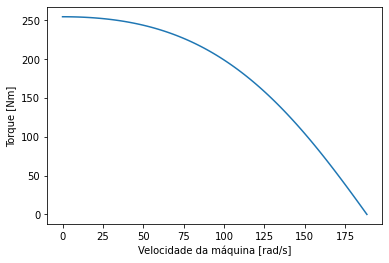

In [61]:
# Calculando o torque

T = (3/omega_s)*(R2_max/((omega_s - omega)/omega_s))*(abs(Vth)**2)/((Rth+R2_max/((omega_s - omega)/omega_s))**2 + (Xth + X2_)**2)

# Plotando a curva

plt.xlabel("Velocidade da máquina [rad/s]")
plt.ylabel("Torque [Nm]")

plt.plot(omega, T)
plt.savefig("Curva torque x velocidade com torque maximo na partida.jpg")
plt.show()